In [23]:
########### tossing coins
'''
Consider the coin tossing example, discussed in the first lecture. Simulate
1000 tosses of the coins, setting H = 0.3. Consider a uniform prior and
update the posterior at each toss. Plot the resulting posterior after 1, 50,
100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting
a Gaussian prior centered in H = 0.5, with standard deviation  = 0.1.
Do both posteriors converge a similar distribution in the end? What does
that mean? Which posterior converges faster and why?
'''

'\nConsider the coin tossing example, discussed in the first lecture. Simulate\n1000 tosses of the coins, setting H = 0.3. Consider a uniform prior and\nupdate the posterior at each toss. Plot the resulting posterior after 1, 50,\n100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting\na Gaussian prior centered in H = 0.5, with standard deviation  = 0.1.\nDo both posteriors converge a similar distribution in the end? What does\nthat mean? Which posterior converges faster and why?\n'

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [30]:
###  FUNCTIONS
 
# Function to compute the likelihood and normalize it (as posterior)
def posterior_likelihood(N_heads, N, p_vals):
    likelihood = (p_vals ** N_heads) * ((1 - p_vals) ** (N - N_heads))  # Binomial likelihood
    return likelihood / np.max(likelihood)  # Normalize likelihood

# Function to intreoduce the gaussian prior
def gaussian_prior(p_vals, mean=0.5, std=0.1):
    return norm.pdf(p_vals, loc=mean, scale=std)

# Function to plot the posterior
def plot_posterior(N_heads, N, toss_num):
    p_vals = np.linspace(0, 1, 1000)  # Probability range from 0 to 1
    posterior = posterior_likelihood(N_heads, N, p_vals)#*gaussian_prior(p_vals)  # Compute posterior as normalized likelihood
    plt.plot(p_vals, posterior, label=f'{toss_num} tosses')



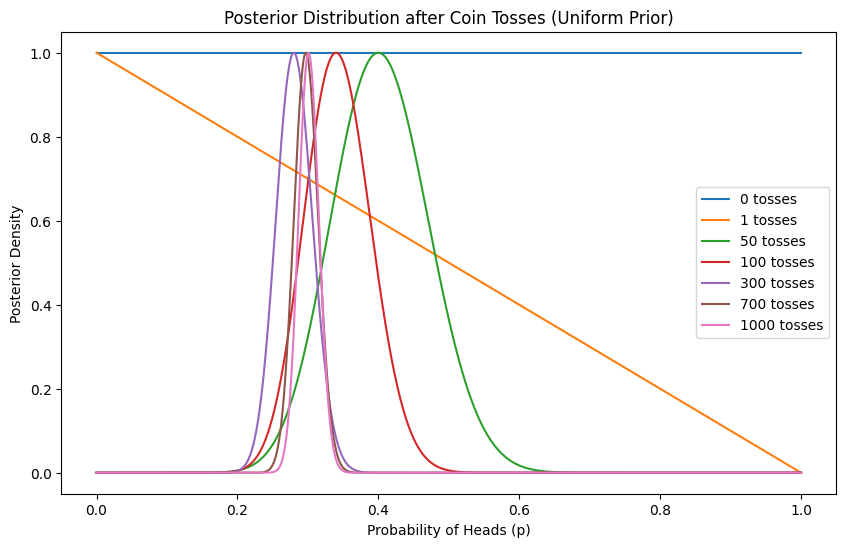

In [31]:
######  MAIN FOR UNIFORM PRIOR

# Parameters
H = 0.3  # True probability of heads
n_tosses = 1000  # Number of tosses
observed_tosses = [0, 1, 50, 100, 300, 700, 1000]  # Points at which to plot the posterior

# Simulate coin tosses (1 = head, 0 = tail)
tosses = np.random.binomial(1, H, n_tosses)

# Loop over tosses and update the posterior at each stage
plt.figure(figsize=(10, 6))
for i in observed_tosses:
    k = np.sum(tosses[:i])  # Count heads in first i tosses
    plot_posterior(k, i, i)

# Finalize the plot
plt.title('Posterior Distribution after Coin Tosses (Uniform Prior)')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Posterior Density')
plt.legend()
plt.show()


In [27]:
###### MAIN FOR GAUSSIAN PRIOR

# Parameters
H = 0.3  # True probability of heads
n_tosses = 1000  # Number of tosses
observed_tosses = [0, 1, 50, 100, 300, 700, 1000]  # Points at which to plot the posterior

# Simulate coin tosses (1 = head, 0 = tail)
tosses = np.random.binomial(1, H, n_tosses)

